# Trabalho Computacional - Processamento Digital de Sinais - ENGC63

**Professor:** Antônio Carlos Lopes Fernandes Júnior

**Grupo:** Matheus Souto, João Paulo Rios, Miguel Ângelo



## Objetivo

**2º Projeto:** Projete, a partir de um filtro passa-baixas *Butterworth* de sexta ordem, um filtro discreto passa-baixas com frequência de corte (-3dB) igual $ω_c = 2π/3$, usando o método de transformação bilinear. Faça a implementação sob forma direta e sob forma em cascata. Represente os coeficientes em ponto flutuante (ex.: $0,00423578 = 0,423578*10^{-2}$) e vá diminuindo o número de casas decimais após a vírgula nas formas direta e em cascata para verificar a sensibilidade à quantização de parâmetros. Trace a curva do módulo da resposta em freqência em dB para os casos de precisão infinita e precisão finita. Em seguida, para a representação em forma direta, refaça os filtros com as 3 transformações em frequência a seguir ($Z^{-1} = -z^{−1}$; $Z^{-1} = z^{-2}$ e $Z^{-1} = -z^{-2}$) e trace a curva do módulo em dB da resposta em frequência resultante.

## Importações

In [ ]:
import numpy as np # Funções matemáticas
import matplotlib.pyplot as plt # Plots gráficos
from scipy.signal import butter, bilinear, freqz, freqs, sosfreqz, tf2zpk, tf2sos, group_delay, lfilter # Funções para projetos de filtros

## Parâmetros do Filtro

In [ ]:
ordem = 6 # Ordem do filtro
wc = 2 * np.pi / 3 # Frequência de corte desejada [rad / s]
print(f'Wc = {wc / np.pi} [pi * rad / s]')

Wc = 0.6666666666666666 [pi * rad / s]


### Filtro passa-baixas Butterworth analógico

$$ |H_c(jΩ)|^2 = \frac{1}{1+(\frac{Ω}{\Omega_c})^{2N}} $$

- $H_c(jΩ)$ - Função de transferência
- $Ω_c$ - Frequência de corte desejada
- $N$ - Ordem do filtro

Como desejamos obter um filtro digital a partir de um filtro analógico com a transformada bilateral, é preciso considerar a compressão não linear do eixo das frequências, conforme a equação:

$$\Omega = \frac{2}{T_d} \tan(\omega / 2)$$

- $T_d$ - Período de amostragem
- $\Omega$ - Frequência analógica
- $\omega$ - Frequência discreta

In [ ]:
fs = 30 # Frequência de amostragem
Td = 1 / fs # Período de amostragem
omegac = (2 / Td) * np.tan(wc / 2) # Conversão para frequência analógica correspondente

# Obtem os polinomios do numerador e denominador do filtro Butterworth analógico
b, a = butter(N=ordem, Wn=omegac, btype="lowpass", analog=True, output='ba')

# Retorna os zeros, polos e ganho a partir da função de transferência do filtro
zerosA, polosA, ganhoA = tf2zpk(b,a)

print(f'Zeros: {zerosA}')
print(f'Polos: {polosA}')

Zeros: []
Polos: [ -26.89726417+100.38195645j  -26.89726417-100.38195645j
 -100.38195645 +26.89726417j -100.38195645 -26.89726417j
  -73.48469228 +73.48469228j  -73.48469228 -73.48469228j]


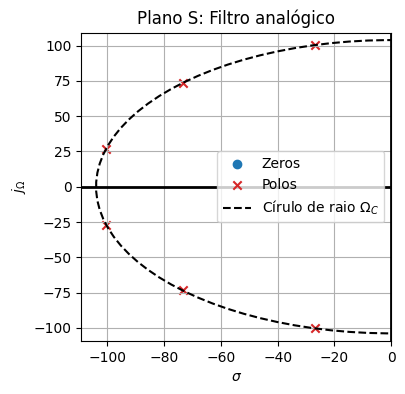

In [ ]:
# Plot dos zeros e polos do filtro analógico
plt.figure(figsize=(4, 4))
plt.scatter(np.real(zerosA), np.imag(zerosA), marker='o', color='tab:blue', label='Zeros')
plt.scatter(np.real(polosA), np.imag(polosA), marker='x', color='tab:red', label='Polos')
plt.plot(omegac * np.cos(np.linspace(0, 2 * np.pi, 100)), omegac * np.sin(np.linspace(0, 2 * np.pi, 100)), color='black', linestyle='--', label='Círulo de raio $\Omega_C$')
plt.axvline(x=0, color='black', linestyle='-', linewidth=2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xlim([-1.05*omegac, 0])
plt.ylim([-1.05*omegac, 1.05*omegac])
plt.title('Plano S: Filtro analógico')
plt.xlabel('$\sigma$')
plt.ylabel('$j_\Omega$')
plt.legend()
plt.grid(True)
plt.show()

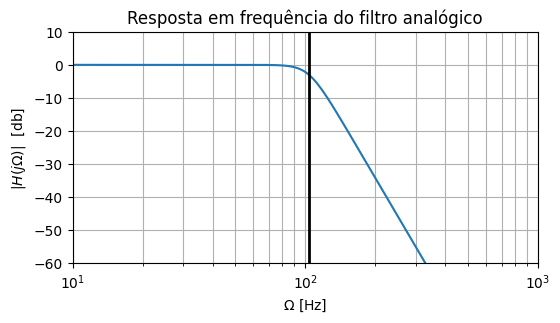

In [ ]:
# Resposta em frequência do filtro analógico
w, h = freqs(b, a)

plt.figure(figsize=(6, 3))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.axvline(x=omegac, color='black', linestyle='-', linewidth=2)
plt.title('Resposta em frequência do filtro analógico')
plt.xlabel('$\Omega$ [Hz]')
plt.ylabel('$|H(j\Omega)|$  [db]')
plt.margins(0, 0.1)
plt.ylim([-60,10])
plt.grid(which='both', axis='both')
plt.show()

### Transformação bilinear

Na transformação bilinear, o eixo $j\Omega$ no plano $s$ é mapeado em uma volta na circunferência unitária no plano $z$, através da equação a seguir.

$$H(z) = H_c(s)$$
com
$$s = \frac{2}{T_d}\left(\frac{1 - z^{-1}}{1+ z^{-1}}\right)$$

Sendo assim, é possível converter o filtro de Butterworth analógico em um filtro digital.

In [ ]:
# Retorna os polinômios do numerador e denominador do filtro digital
bd, ad = bilinear(b, a, fs = fs)
print(f'Coeficientes: {bd} / {ad}')
print()

# Retorna os zeros, polos e ganho a partir da função de transferência do filtro
zerosD, polosD, ganhoD = tf2zpk(bd,ad)
print(f'Zeros: {zerosD}')
print()
print(f'Polos: {polosD}')

Coeficientes: [0.11638344 0.69830062 1.74575154 2.32766872 1.74575154 0.69830062
 0.11638344] / [1.         1.98161074 2.25237962 1.46928295 0.59626258 0.13544034
 0.01356368]

Zeros: [-1.00279389+0.j         -1.00138691+0.00241957j -1.00138691-0.00241957j
 -0.99860308+0.00240223j -0.99860308-0.00240223j -0.99722613+0.j        ]

Polos: [-0.40844872+0.68334803j -0.40844872-0.68334803j -0.31010205+0.3797959j
 -0.31010205-0.3797959j  -0.27225459+0.1220484j  -0.27225459-0.1220484j ]


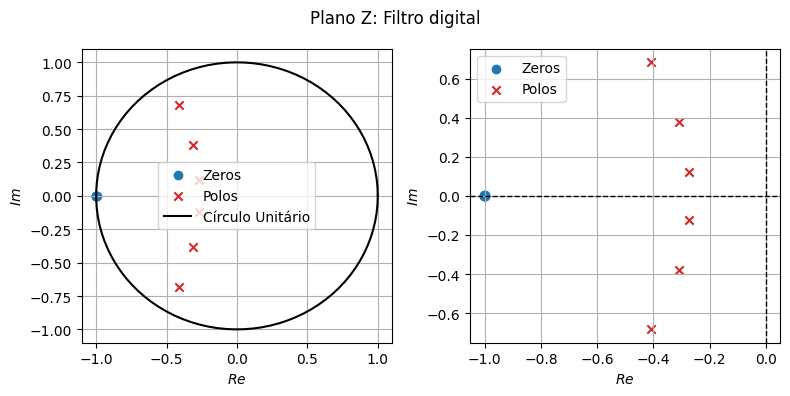

In [ ]:
# Plot dos zeros e polos do filtro digital
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Plano Z: Filtro digital')
axs[0].scatter(np.real(zerosD), np.imag(zerosD), marker='o', color='tab:blue', label='Zeros')
axs[0].scatter(np.real(polosD), np.imag(polosD), marker='x', color='tab:red', label='Polos')
axs[0].plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), color='black', linestyle='-', label='Círculo Unitário')
axs[0].set_xlabel('$Re$')
axs[0].set_ylabel('$Im$')
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(np.real(zerosD), np.imag(zerosD), marker='o', color='tab:blue', label='Zeros')
axs[1].scatter(np.real(polosD), np.imag(polosD), marker='x', color='tab:red', label='Polos')
axs[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axs[1].set_xlabel('$Re$')
axs[1].set_ylabel('$Im$')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Conclusão:** Percebe-se que todos os polos foram mapeados para o interior do circulo unitário no plano Z.

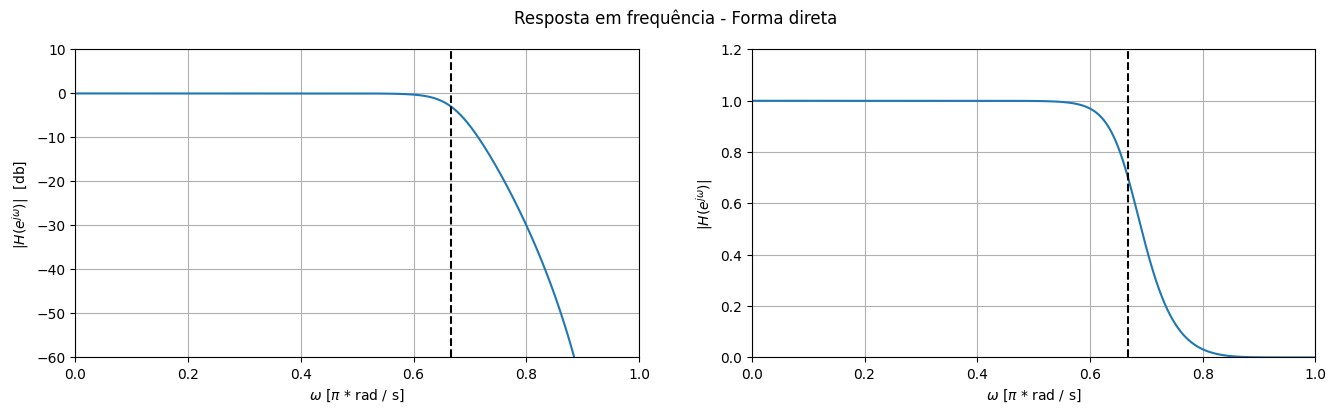

In [ ]:
# Função para plotagem da resposta em requência com base na função de transferência
def plot_frequencia(bd, ad, wc, fig, axs):
  # Computa a resposta em frequência do filtro
  wz, hz = freqz(bd, ad, worN=8000)

  axs[0].plot(wz / np.pi, 20*np.log10(np.abs(hz)))
  axs[0].set_ylabel("$|H(e^{j\omega})|$  [db]")
  axs[0].set_xlabel("$\omega$ [$\pi$ * rad / s]")
  axs[0].set_xlim([0,1])
  axs[0].set_ylim([-60,10])
  axs[0].grid()

  axs[1].plot(wz / np.pi, np.abs(hz))
  axs[1].set_ylabel("$|H(e^{j\omega})|$")
  axs[1].set_xlabel("$\omega$ [$\pi$ * rad / s]")
  axs[1].set_xlim([0,1])
  axs[1].set_ylim([0,1.2])
  axs[1].grid()

fig,axs = plt.subplots(1,2, figsize=(16, 4))
plot_frequencia(bd, ad, wc, fig, axs)
axs[0].axvline(wc / np.pi, color="k", linestyle="--")
axs[1].axvline(wc / np.pi, color="k", linestyle="--")
fig.suptitle("Resposta em frequência - Forma direta")
plt.show()

<ipython-input-11-490558659a5b>:2: UserWarning: The filter's denominator is extremely small at frequencies [3.135],             around which a singularity may be present
  w, gd = group_delay((bd, ad))


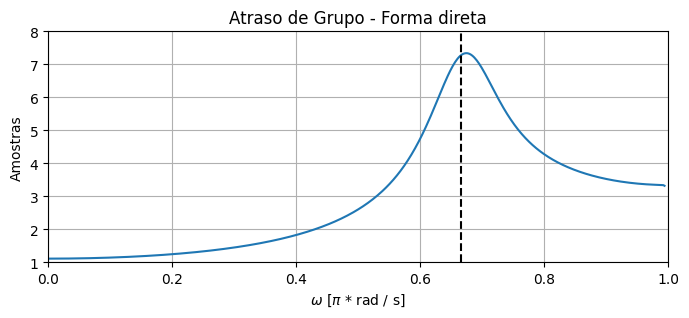

In [ ]:
# Computa o atraso de grupo
w, gd = group_delay((bd, ad))

fig = plt.figure(figsize=(8,3))
plt.plot(w[:-2] / np.pi, gd[:-2])
plt.axvline(wc / np.pi, color="k", linestyle="--")
plt.ylabel("Amostras")
plt.xlabel("$\omega$ [$\pi$ * rad / s]")
plt.title("Atraso de Grupo - Forma direta")
plt.xlim([0,1])
plt.ylim([1,8])
plt.grid()

Podemos obter o sistema equivalente na forma em cascata através da função "tf2sos", que realiza uma transformação da função de transferência para a forma de seções de segunda ordem.

In [ ]:
# Conversão para formato em cascata
cascata = tf2sos(bd,ad, analog=False)
print(f'Coeficientes: {cascata}')
print()
print(f'Formato da matriz: {cascata.shape}')

Coeficientes: [[0.11638344 0.2330897  0.11670717 1.         0.54450919 0.08901837]
 [1.         2.00002002 1.00001227 1.         0.6202041  0.24040821]
 [1.         1.99720616 0.99721388 1.         0.81689745 0.63379489]]

Formato da matriz: (3, 6)


In [ ]:
# Função para plotagem da resposta em requência com base na função de transferência
def plot_frequencia_cascata(sos, fig, axs):
  # Computa a resposta em frequência do filtro em cascata
  wz, hz = sosfreqz(sos,worN=8000)

  axs[0].plot(wz / np.pi, 20*np.log10(np.abs(hz)))
  axs[0].set_ylabel("$|H(e^{j\omega})|$  [db]")
  axs[0].set_xlabel("$\omega$ [$\pi$ * rad / s]")
  axs[0].set_xlim([0,1])
  axs[0].set_ylim([-60,10])
  axs[0].grid()

  axs[1].plot(wz / np.pi, np.abs(hz))
  axs[1].set_ylabel("$|H(e^{j\omega})|$")
  axs[1].set_xlabel("$\omega$ [$\pi$ * rad / s]")
  axs[1].set_xlim([0,1])
  axs[1].set_ylim([0,1.2])
  axs[1].grid()

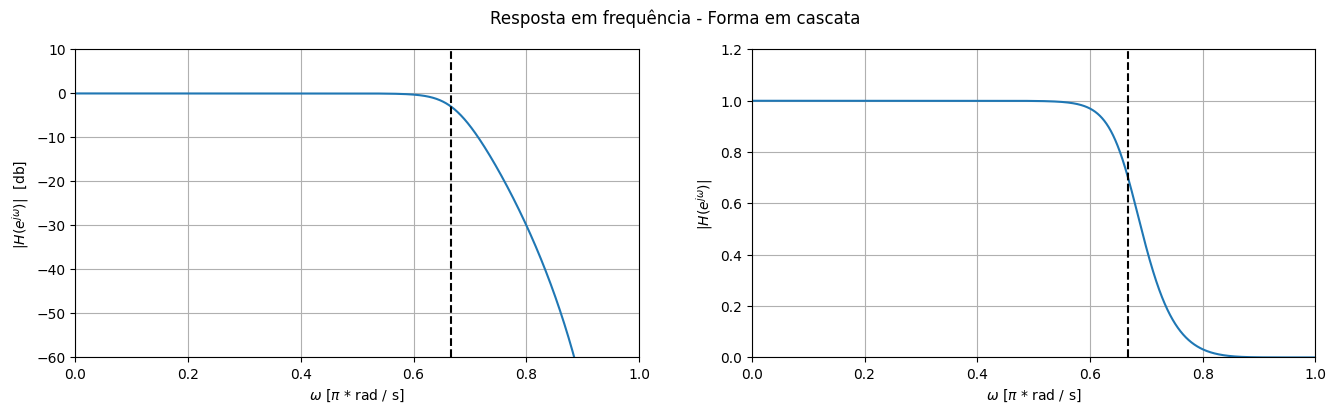

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(16, 4))
plot_frequencia_cascata(cascata,fig, axs)
axs[0].axvline(wc / np.pi, color="k", linestyle="--")
axs[1].axvline(wc / np.pi, color="k", linestyle="--")
fig.suptitle("Resposta em frequência - Forma em cascata")
plt.show()

## Mudança de precisão

É possível verificar a mudança no comportamento do filtro com base na variação do número de casas decimais dos coeficientes, representando uma mudança na precisão. Para isso, foi utilizada a função np.round(), que arredonda os valores de um array com base no número de casas fornecido.

Os algoritmos a seguir comparam as respostas em frequência dos diferentes filtros.

### Forma direta:

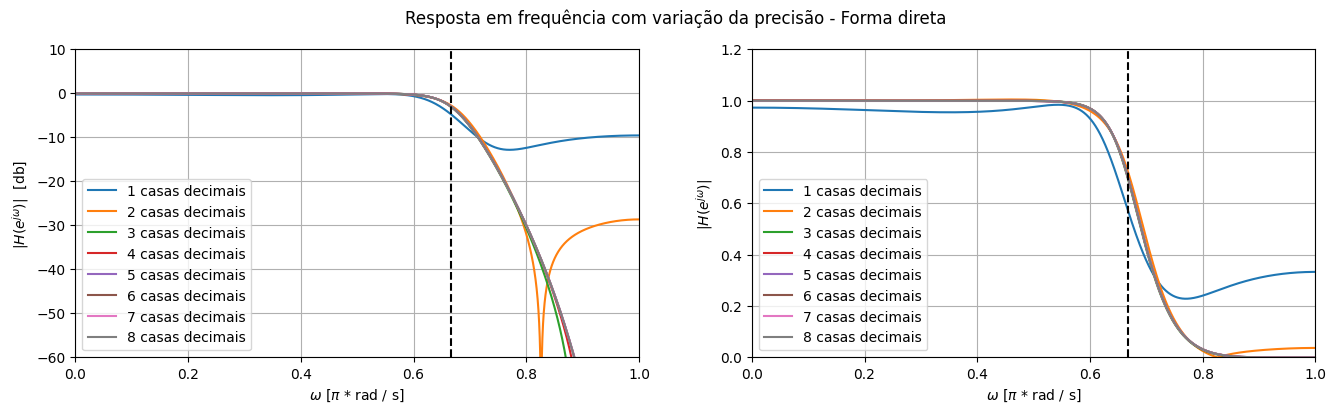

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(16, 4))

max_casas = 9
for n_casas in range(1,max_casas):
  # Arredonda os valores dos coeficientes
  _b = np.round(bd, decimals=n_casas)
  _a = np.round(ad, decimals=n_casas)
  plot_frequencia(_b, _a, wc, fig, axs)

axs[0].legend([f"{n_casas} casas decimais" for n_casas in range(1,max_casas)], loc="lower left")
axs[0].axvline(wc / np.pi, color="k", linestyle="--")
axs[0].grid()

axs[1].legend([f"{n_casas} casas decimais" for n_casas in range(1,max_casas)], loc="lower left")
axs[1].axvline(wc / np.pi, color="k", linestyle="--")
axs[1].grid()

fig.suptitle("Resposta em frequência com variação da precisão - Forma direta")
plt.show()

**Conclusão:** Observa-se uma piora considerável no comportamento do filtro para menores números de casas decimais, perdendo o comportamento esperado para um filtro Butterworth, principalmente para valores de até 2 casas decimais.

### Forma em cascata:

Para a forma em cascata, considerando que os sistemas são LIT, podemos obter a resposta total a partir da soma das respostas individuas de cada parcela.

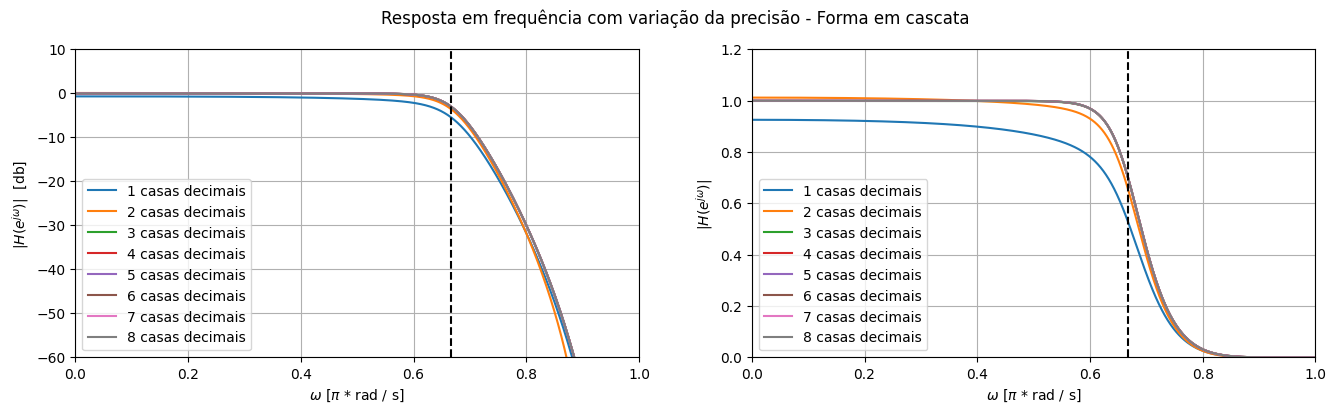

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(16, 4))

max_casas = 9
for n_casas in range(1,max_casas):
  # Arredonda os valores dos coeficientes
  _sos = np.round(cascata, decimals=n_casas)
  plot_frequencia_cascata(_sos, fig, axs)

axs[0].legend([f"{n_casas} casas decimais" for n_casas in range(1,max_casas)], loc="lower left")
axs[0].axvline(wc / np.pi, color="k", linestyle="--")
axs[0].grid()

axs[1].legend([f"{n_casas} casas decimais" for n_casas in range(1,max_casas)], loc="lower left")
axs[1].axvline(wc / np.pi, color="k", linestyle="--")
axs[1].grid()

fig.suptitle("Resposta em frequência com variação da precisão - Forma em cascata")
plt.show()

**Conclusão:** Observa-se que quando comparado ao filtro implementado em forma direta, o filtro em cascata apresenta uma tolerância muito maior à variações na precisão dos valores dos coeficientes, inclusive para valores de até 1 ou 2 casas decimais, diferente da implementação direta.

## Transformações em frequência:

### Transformação $Z^{-1} = -z^{-1}$

> **Tabela 7.1 Oppenheim:** Passa-baixas-Passa-altas
$$Z^{-1} = -\frac{z^{-1} + \alpha}{1+\alpha z^{-1}}, \ \alpha = -\frac{cos(\frac{θ_p + ω_p}{2})}{cos(\frac{θ_p - ω_p}{2})}$$

- $θ_p$: frequência de *cutoff* do filtro original;
- $\omega_p$: frequência de *cutoff* desejada;

\

A transformação em questão corresponde a um filtro passa-altas quando $\alpha = 0$.

Essa transformação pode ser representada pela mudança de sinal dos coeficientes pares, já que $Z^{-2n} = (Z^{-1})^{2n} = (-z^{-1})^{2n} = z^{-2n}$

In [ ]:
# Gera as listas com os coeficientes transformados
def transformacao_1(bd,ad):
  bd_transformado = []
  ad_transformado = []
  for index,coeficiente in enumerate(bd):
    if index % 2 != 0: # Inverte o sinal para os índices pares
      bd_transformado.append(coeficiente)
    else:
      bd_transformado.append(coeficiente * -1)

  for index,coeficiente in enumerate(ad):
    if index % 2 != 0: # Inverte o sinal para os índices pares
      ad_transformado.append(coeficiente)
    else:
      ad_transformado.append(coeficiente * -1)

  return bd_transformado, ad_transformado

bd_1, ad_1 = transformacao_1(bd,ad)


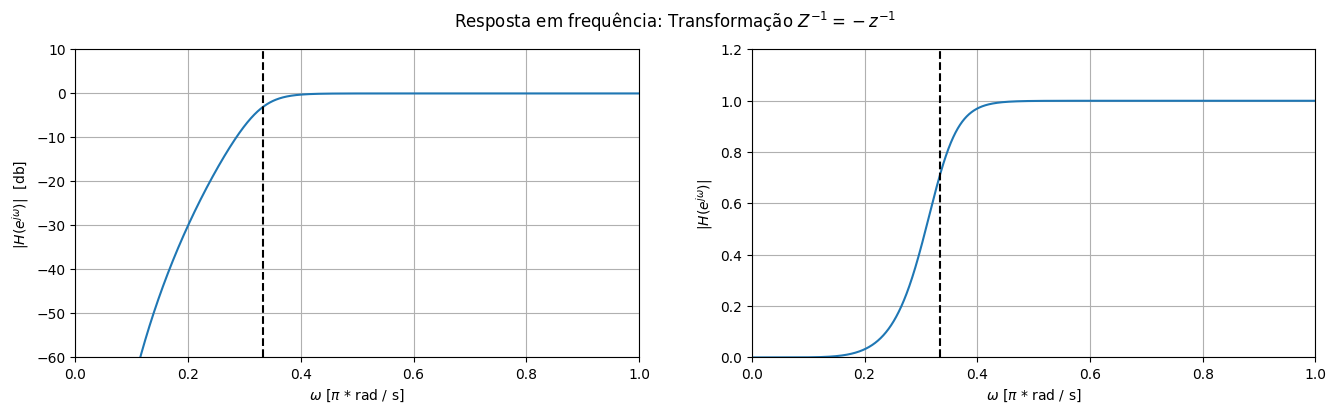

In [ ]:
# Plot da resposta em frequência
fig,axs = plt.subplots(1,2, figsize=(16, 4))
plot_frequencia(bd_1, ad_1, wc, fig, axs)
axs[0].axvline(1 - wc / np.pi, color="k", linestyle="--")
axs[1].axvline(1 - wc / np.pi, color="k", linestyle="--")
fig.suptitle("Resposta em frequência: Transformação $Z^{-1} = -z^{-1}$")
plt.show()

### Transformação $Z^{-1} = z^{-2}$

> **Tabela 7.1 Oppenheim:** Passa-baixas-Rejeita-faixa
$$Z^{-1} = \frac{z^{-2} - \frac{2\alpha}{1+k}z^{-1} + \frac{1-k}{1+k}}{\frac{1-k}{1+k}z^{-2} - \frac{2\alpha}{1+k}z^{-1} + 1},\ \alpha = \frac{cos(\frac{\omega_{p2} + ω_{p1}}{2})}{cos(\frac{\omega_{p2} - ω_{p1}}{2})}$$

$$k = tan(\frac{\omega_{p2} - ω_{p1}}{2})tan(\frac{θ_p}{2}) $$

- $θ_p$: frequência de *cutoff* do filtro original;
- $\omega_{p1}$: frequência de *cutoff* inferior desejada;
- $\omega_{p2}$: frequência de *cutoff* superior desejada;

\

A transformação em questão corresponde a um filtro rejeita-faixa quando $\alpha = 0$ e $k = 1$.

Nessa transformação, os coeficientes de índice ímpares são zerados, enquanto os demais, com exceção do termo constante, são representados na forma $b_n = B_{\frac{n}{2}}$. Portanto, $b_2 = B_1, b_{10} = B_5 ...$, sendo $b_n$ os coeficiêntes da função transformada e $B_n$ os coeficientes da função original.

In [ ]:
# Gera as listas com os coeficientes transformados
def transformacao_2(bd,ad):
  bd_transformado = []
  ad_transformado = []
  index_2 = 0

  for index in range(len(bd) * 2 - 1):
    if index % 2 != 0: # Zera os valores ímpares
      bd_transformado.append(0)
    else: # Aplica a transformação nos demais
      bd_transformado.append(bd[index_2])
      index_2 = index_2 + 1

  index_2 = 0
  for index in range(len(ad) * 2 - 1):
    if index % 2 != 0: # Zera os valores ímpares
      ad_transformado.append(0)
    else: # Aplica a transformação nos demais
      ad_transformado.append(ad[index_2])
      index_2 = index_2 + 1

  return bd_transformado, ad_transformado

bd_2, ad_2 = transformacao_2(bd,ad)

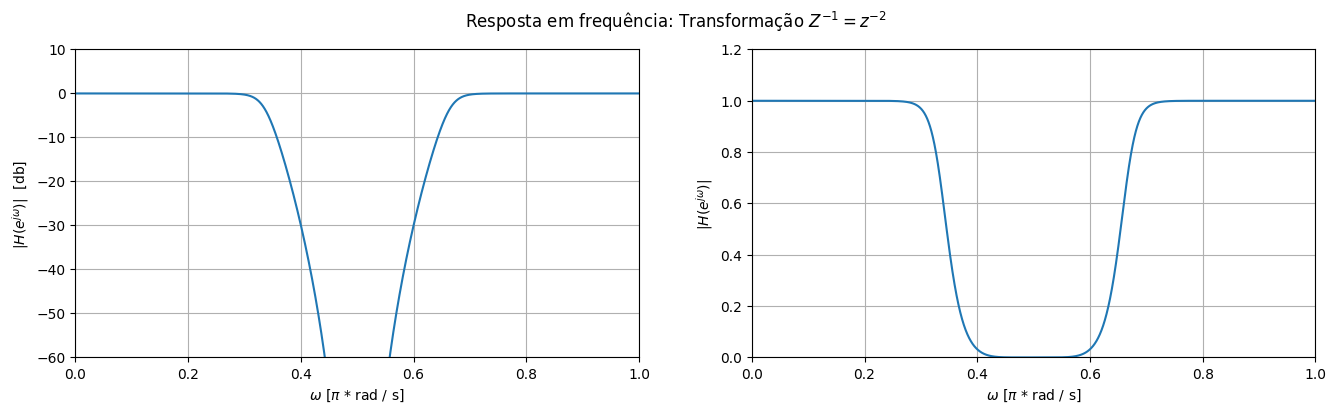

In [ ]:
# Plot da resposta em frequência
fig,axs = plt.subplots(1,2, figsize=(16, 4))
plot_frequencia(bd_2, ad_2, wc, fig, axs)
fig.suptitle("Resposta em frequência: Transformação $Z^{-1} = z^{-2}$")
plt.show()

### Transformação $Z^{-1} = -z^{-2}$

> **Tabela 7.1 Oppenheim:** Passa-baixas-Passa-faixa
$$Z^{-1} = \frac{z^{-2} - \frac{2\alpha}{k+1}z^{-1} + \frac{k-1}{k+1}}{\frac{k-1}{k+1}z^{-2} - \frac{2\alpha}{k+1}z^{-1} + 1},\ \alpha = \frac{cos(\frac{\omega_{p2} + ω_{p1}}{2})}{cos(\frac{\omega_{p2} - ω_{p1}}{2})}$$

$$ k = tan(\frac{\omega_{p2} - ω_{p1}}{2})tan(\frac{θ_p}{2}) $$

- $θ_p$: frequência de *cutoff* do filtro original;
- $\omega_{p1}$: frequência de *cutoff* inferior desejada;
- $\omega_{p2}$: frequência de *cutoff* superior desejada;

A transformação em questão corresponde a um filtro passa-faixa quando $\alpha = 0$ e $k = 1$.

Essa transformação pode ser implementada pela aplicação em sequência das duas anteriores.

In [ ]:
# Aplica as duas transformações em sequência
bd_1, ad_1 = transformacao_1(bd,ad)
bd_3, ad_3 = transformacao_2(bd_1, ad_1)

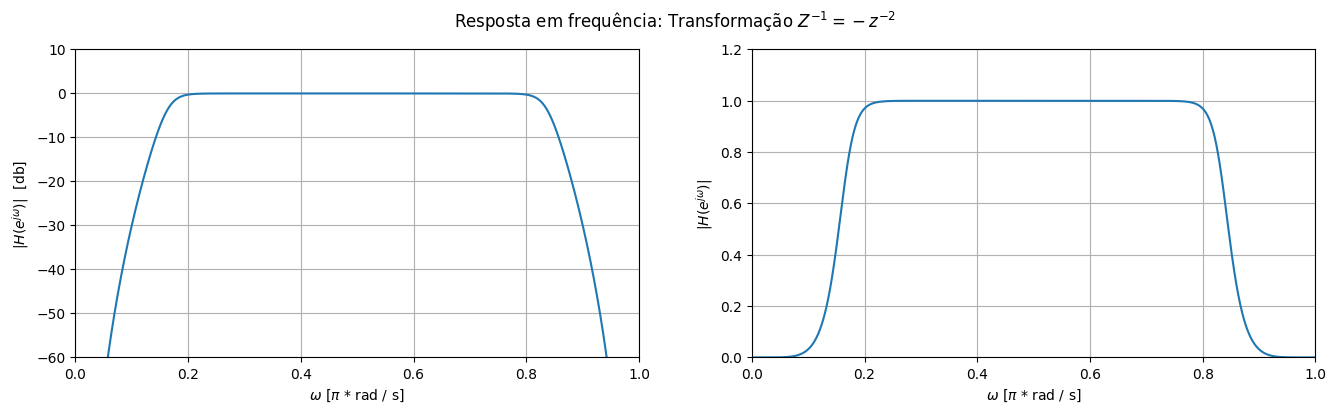

In [ ]:
# Plot da resposta em frequência
fig,axs = plt.subplots(1,2, figsize=(16, 4))
plot_frequencia(bd_3, ad_3, wc, fig, axs)
fig.suptitle("Resposta em frequência: Transformação $Z^{-1} = -z^{-2}$")
plt.show()

## Aplicações dos filtros

Na seção anterior, a partir de um filtro passa-baixas Butterworth, foram gerados os seguintes filtros:

- Passa-altas
- Rejeita-faixa
- Passa-faixa

Nesta seção, será abordado o funcionamento de cada um deles e como o sinal é alterado conforme suas aplicações. Escolheu-se sinais de entrada compostos pela associação de senoides em diferentes frequências, para verificar a funcionalidade de cada filtro.

In [ ]:
# Função auxiliar para gerar um sinal com duas frequências, para que uma delas seja filtrada.
def gerar_sinal_entrada(first_freq, second_freq):

  T = 5.0  # Tempo de análise em segundos
  n = int(T * fs)  # Total de amostras
  t = np.linspace(0, T, n, endpoint=False)

  # Sinal de entrada para aplicação do filtro
  x = (
      np.sin(fs * first_freq * np.pi * t)
      + np.sin(fs * second_freq * np.pi * t)
  )

  return x, t

In [ ]:
# Função auxiliar para exibir os resultados da aplicação do filtro ao sinal de entrada.
def plot_sinal_filtrado(x, t, a, b, tipo_filtro):
  fig = plt.figure(figsize=(8,3))
  plt.plot(t, x, "b-", label="Sinal original")
  plt.plot(t, lfilter(b, a, x), "g-", linewidth=2, label="Sinal filtrado")
  plt.xlabel("Time [sec]")
  plt.title(f"Aplicação - {tipo_filtro}")
  plt.grid()
  plt.legend()
  plt.show()

### Filtro passa-baixas

A função do filtro passa-baixas é remover as frequências acima de uma determinada frequência de corte:

> $ω_c = \frac{2\pi}{3}$.

Portanto, a frequência de $0.05\pi$ deverá ser preservada enquanto a frequência de $0.8\pi$ deverá ser removida.

In [ ]:
x, t = gerar_sinal_entrada(first_freq=0.05, second_freq=0.8)

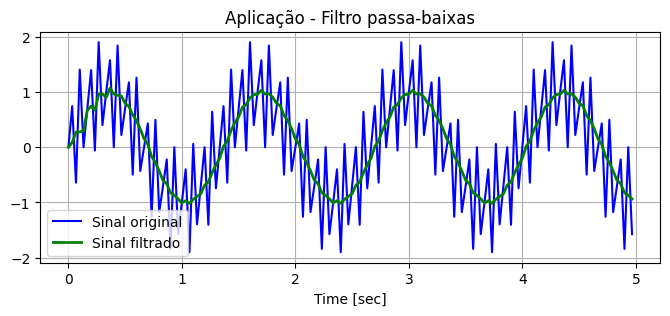

In [ ]:
plot_sinal_filtrado(x, t, ad, bd, "Filtro passa-baixas")

Algumas aplicações reais dos filtros passa-baixas são:

- **Modulação e demodulação de sinais:** usados para remover frequências indesejadas e ruídos de alta frequência, garantindo uma transmissão de dados confiável.
- **Redução de ruído em imagens:** aplicados para suavizar imagens, reduzindo o ruído de alta frequência. Especialmente úteis em aplicações como reconhecimento de padrões e processamento de imagem médica.
- **Monitoramento de sinais biomédicos:** usados para filtrar ruídos e interferências de alta frequência em sinais biológicos, como eletrocardiogramas (ECG) e eletroencefalogramas (EEG).
- **Controle de velocidade em motores elétricos:** empregados para suavizar sinais de *feedback* e garantir um controle estável da velocidade do motor.
- **Filtragem em linhas de transmissão:** usados para eliminar harmônicas e interferências, garantindo uma transmissão de sinal mais limpa e estável.

### Filtro passa-altas

A função do filtro passa-altas é remover as frequências abaixo de uma determinada frequência de corte:

> $ω_c = \frac{\pi}{3}$

**Obs:** É possível perceber que este valor atende ao requisito de $α = 0$, observado durante a transformação Passa-baixas-Passa-altas na seção anterior.

Portanto, a frequência de $0.8\pi$ deverá ser preservada enquanto a frequência de $0.05\pi$ deverá ser removida.

In [ ]:
x, t = gerar_sinal_entrada(first_freq=0.05, second_freq=0.8)

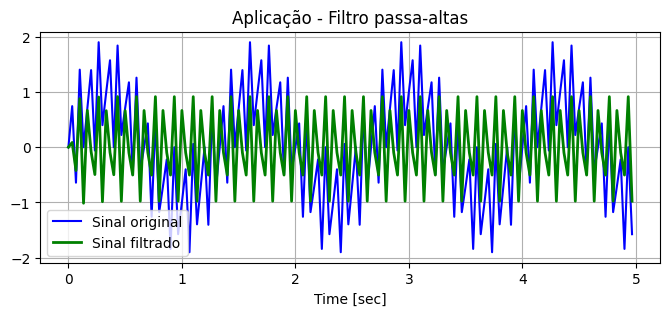

In [ ]:
plot_sinal_filtrado(x, t, ad_1, bd_1, "Filtro passa-altas")

Algumas aplicações reais dos filtros passa-altas são:

- **Detecção de borda em processamento de imagem:** utilizados para realçar bordas em imagens, destacando mudanças abruptas de intensidade de pixel. Isso é essencial em tarefas como detecção de objetos e reconhecimento de padrões.
- **Melhoria da nitidez em fotografia:** aplicados para aumentar a nitidez, realçando detalhes finos e melhorando a definição da imagem.
- **Processamento de vídeo:** usados para identificar movimentos ou alterações significativas de cena, auxiliando em sistemas de vigilância e rastreamento de objetos.
- **Equalização de áudio:** usados na equalização para realçar ou atenuar frequências específicas, ajustando o perfil tonal de um som.
- **Remoção de tendência em séries temporais:**  aplicados para remover tendências de baixa frequência, permitindo a identificação de padrões de curto prazo.

### Filtro rejeita-faixa

A função do filtro rejeita-faixa é remover as frequências que se encontram entre dois determinados valores de frequências de corte:

> $ω_{c_1} = \frac{\pi}{3}; \ ω_{c_2} = \frac{2\pi}{3}$

**Obs:** É possível perceber que estes valores atendem ao requisitos de $α = 0$ e $k = 1$, observados durante a transformação Passa-baixas-Rejeita-faixa na seção anterior.

Portanto, a frequência de $0.05\pi$ deverá ser preservada enquanto a frequência de $0.5\pi$ deverá ser removida.

In [ ]:
x, t = gerar_sinal_entrada(first_freq=0.05, second_freq=0.5)

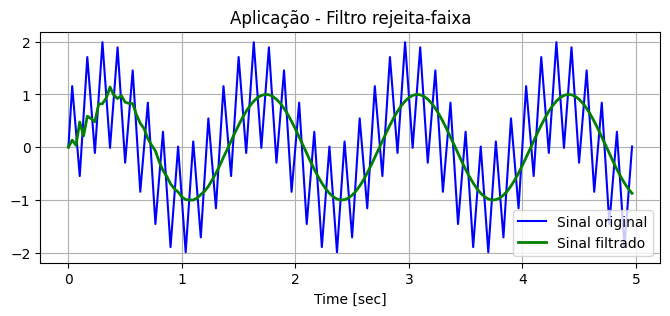

In [ ]:
plot_sinal_filtrado(x, t, ad_2, bd_2, "Filtro rejeita-faixa")

Algumas aplicações reais dos filtros rejeita-faixa são:

- **Remoção de componentes específicos em análise de sinal** aplicados para remover seletivamente componentes indesejados em uma faixa de frequência específica, permitindo uma análise mais precisa e focada.
- **Análise espectral em pesquisas científicas:** podem ser aplicados para isolar e estudar frequências específicas de interesse em sinais complexos
- **Supressão de ressonâncias em sistemas mecânicos:** no âmbito da engenharia mecânica, os filtros rejeita-faixa podem ser aplicados para suprimir ressonâncias indesejadas em sistemas vibratórios.

### Filtro passa-faixa

A função do filtro passa-faixa é remover as frequências que **não** se encontram entre dois determinados valores de frequências de corte:

> $ω_{c1} = \frac{\pi}{3}; \ ω_{c2} = \frac{2\pi}{3}$

**Obs:** É possível perceber que estes valores atendem ao requisitos de $α = 0$ e $k = 1$, observados durante a transformação Passa-baixas-Passa-faixa na seção anterior.

Portanto, a frequência de $0.5\pi$ deverá ser preservada enquanto a frequência de $0.05\pi$ deverá ser removida.

In [ ]:
x, t = gerar_sinal_entrada(first_freq=0.05, second_freq=0.5)

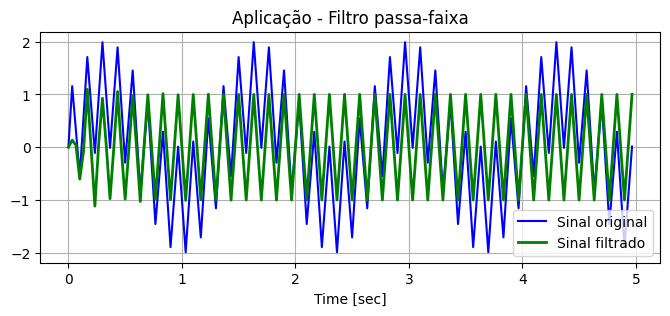

In [ ]:
plot_sinal_filtrado(x, t, ad_3, bd_3, "Filtro passa-faixa")

Algumas aplicações reais dos filtros passa-faixa são:

- **Comunicação de dados em rede sem fio:** usados para permitir a transmissão eficiente de sinais em uma faixa de frequência específica, otimizando a comunicação em redes sem fio.
- **Medição de glicose em monitores de diabetes:** empregados para selecionar a faixa de frequência correspondente às características ópticas específicas relacionadas à concentração de glicose na amostra sanguínea.
- **Tratamento de doenças:** utilizados em sistemas de radioterapia para garantir que apenas a faixa de energia específica seja aplicada durante o tratamento, direcionando a radiação para o alvo desejado.

### Filtro passa-baixas seguido de passa-altas

Agora, apenas a título de curiosidade, um sinal com frequências

- $ω_1 = 0.05π$
- $ω_2 = 0.8\pi$

Será passado por dois filtros seguidos:

- FPB com $ω_c = \frac{2\pi}{3}$
- FPA com $ω_c = \frac{\pi}{3}$

In [ ]:
x, t = gerar_sinal_entrada(first_freq=0.05, second_freq=0.8)

In [ ]:
y_1 = lfilter(bd, ad, x)
y_2 = lfilter(bd_1, ad_1, y_1)

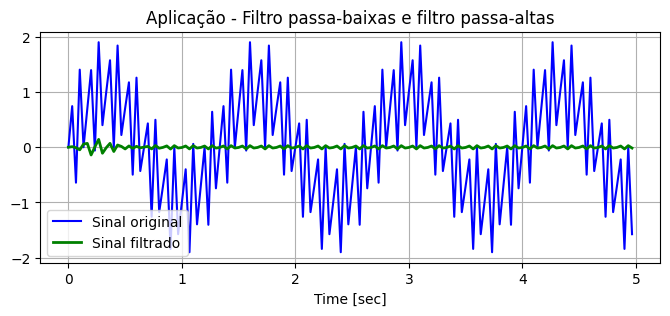

In [ ]:
fig = plt.figure(figsize=(8,3))
plt.plot(t, x, "b-", label="Sinal original")
plt.plot(t, y_2, "g-", linewidth=2, label="Sinal filtrado")
plt.xlabel("Time [sec]")
plt.title(f"Aplicação - Filtro passa-baixas e filtro passa-altas")
plt.grid()
plt.legend()
plt.show()

**Conclusão:** Observa-se que todas as frequências foram removidas e o sinal foi zerado, visto que $ω_2$ estava acima da frequência do passa-baixas e $ω_1$ estava abaixo da frequência do passa-altas.